# Prova escrita 2 - Estadística.

La WHO (OMS) ha quedat impressionada amb les pràctiques que heu realitzat a DAWBIO2 aquest curs i és per això
que us encarrega resoldre preguntes importants sobre el dataset adjunt **incidence-rate-2021-raw.csv**
, que recopila la incidència de les enfermetats en tot el món.
Si extraieu gràfics, coneixement i conclusions rellevants segur que voldran contractar-vos.

## Autor: Denys Chorny

### Observacions:
#### Consulta al professor quan hagis aconseguit cada gràfic que es demana.
#### Els gràfics de la carpeta output són orientatius, no és necessari que us quedin igual; l'important és resoldre les preguntes.
#### Pots utilitzar més d'un fitxer Jupyter Notebook per a fer l'examen si et va bé, o fitxers de Python.
#### Molts ànims!

## Part 1. Preguntes bàsiques, gestió de valors NA, gràfic bàsic i outliers. (3 punts)

### 1.1 Preguntes bàsiques. 1 punts.
### 1.2 Gràfic de files de cada GROUP. 1 punts.
### 1.3 Gràfic d'outliers. 1 punts.

Us donem el codi de la importació i el context de les dades.

### Importació del Dataset.

Mostrem les primeres files i els dtypes de cada columna.

In [241]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [242]:
incidence_raw = pd.read_csv("incidence-rate-2021-raw.csv", sep=';', decimal=".")

incidence_new = copy.deepcopy(incidence_raw)

print(incidence_raw.dtypes)

print(incidence_raw.head(20))

GROUP                   object
CODE                    object
NAME                    object
YEAR                     int64
DISEASE                 object
DISEASE_DESCRIPTION     object
DENOMINATOR             object
INCIDENCE_RATE         float64
dtype: object
        GROUP CODE   NAME  YEAR     DISEASE          DISEASE_DESCRIPTION  \
0   COUNTRIES  ABW  Aruba  2021         CRS  Congenital rubella syndrome   
1   COUNTRIES  ABW  Aruba  2021  DIPHTHERIA                   Diphtheria   
2   COUNTRIES  ABW  Aruba  2021     MEASLES                      Measles   
3   COUNTRIES  ABW  Aruba  2021       MUMPS                        Mumps   
4   COUNTRIES  ABW  Aruba  2021    NTETANUS             Neonatal tetanus   
5   COUNTRIES  ABW  Aruba  2021   PERTUSSIS                    Pertussis   
6   COUNTRIES  ABW  Aruba  2021       POLIO                Poliomyelitis   
7   COUNTRIES  ABW  Aruba  2021     RUBELLA                      Rubella   
8   COUNTRIES  ABW  Aruba  2021    TTETANUS           

### Pregunta 1.1 -> Preguntes bàsiques: files, tipus de dades, NA's

#### Explicació del context. Què son aquestes dades? Posar referències.

Representen els ratios d'incidencia de casos de diferents enfermedades contagioses en molts països. 
Aquest ratio està representat pel camp **INCIDENCE_RATE.**

S'utilitzen diverses maneres de calcular aquestes ratios, ho indica el camp **DENOMINATOR.**
No és el mateix mesurar 'per 1,000,000 total population' que ';per 1,000,000 <15 population'

**GROUP** Pot ser un país, una agrupació de països o un estat.

**CODE** és la abreviatura del nom del país/estat/grup **NAME** .

**DISEASE** és el nom de la enfermetat.

**YEAR**: Des de 1980 a 2021

#### Referència:

Dataset extret del portal Inmunization Data, de la WHO (la OMS)

[https://immunizationdata.who.int/listing.html?topic=&location=]

#### Quantes files té el dataset ?

In [243]:
print("Tiene:", len(incidence_new), "Filas.")

Tiene: 79448 Filas.


#### Llista els valors possibles que poden tenir els camps DENOMINATOR, el GROUP i el DISEASE.

In [244]:
# DENOMINATOR:
[print(unique) for unique in incidence_new.loc[:,"DENOMINATOR"].unique()]

per 10,000 live births
per 1,000,000 total population
per 1,000 live births
per 1,000,000 <15 population
per 1000 live births


[None, None, None, None, None]

In [245]:
# GROUP:
incidence_new.loc[:,"GROUP"].unique()
incidence_new.loc[:,"GROUP"].value_counts()

COUNTRIES      76787
WHO_REGIONS     2274
GLOBAL           387
Name: GROUP, dtype: int64

In [246]:
# DISEASE:
incidence_new.loc[:,"DISEASE"].value_counts()

MEASLES       8929
NTETANUS      8909
DIPHTHERIA    8908
PERTUSSIS     8907
POLIO         8883
TTETANUS      8855
YFEVER        8850
RUBELLA       4787
CRS           4733
MUMPS         4704
JAPENC        2983
Name: DISEASE, dtype: int64

#### Hi ha NAs? En quines columnes ? Quina columna en té més ? 

In [247]:
#incidence = incidence.dropna()
incidence_new.isna().sum()

#La columna de INCIDENCE_RATE es la que mas tiene.

GROUP                      0
CODE                       0
NAME                       0
YEAR                       0
DISEASE                    0
DISEASE_DESCRIPTION        0
DENOMINATOR                0
INCIDENCE_RATE         18637
dtype: int64

#### Quin percentatge de valors NA hi ha a la columna que en té més ? 

In [248]:
# Con esto obtenemos el porcentaje
incidence_new.isna().sum() / len(incidence_new)

GROUP                  0.000000
CODE                   0.000000
NAME                   0.000000
YEAR                   0.000000
DISEASE                0.000000
DISEASE_DESCRIPTION    0.000000
DENOMINATOR            0.000000
INCIDENCE_RATE         0.234581
dtype: float64

#### Resultat final preguntes bàsiques. Guarda totes les files que tinguin com a GROUP=COUNTRIES en un fitxer, i com a GROUP=GLOBAL en un altre fitxer.

<em> No oblidis eliminar la columna GROUP, ja que ja no servirà. </em>

In [249]:
mask_global = incidence_new.loc[:,"GROUP"] == "GLOBAL"

df_incidence_global = incidence_new.loc[mask_global,:]

df_incidence_global.to_csv('dincidence_rate_2021_global.csv', index=False, sep=';', decimal=",")

print(df_incidence_global.head(5),"\n")

mask_countries = incidence_new.loc[:,"GROUP"] == "COUNTRIES"

df_incidence_countries = incidence_new.loc[mask_countries,:]

df_incidence_countries.to_csv('dincidence_rate_2021_countries.csv', index=False, sep=';', decimal=",")

print(df_incidence_countries.head(5))

        GROUP    CODE    NAME  YEAR     DISEASE          DISEASE_DESCRIPTION  \
27056  GLOBAL  GLOBAL  Global  2021         CRS  Congenital rubella syndrome   
27057  GLOBAL  GLOBAL  Global  2021  DIPHTHERIA                   Diphtheria   
27058  GLOBAL  GLOBAL  Global  2021      JAPENC        Japanese encephalitis   
27059  GLOBAL  GLOBAL  Global  2021     MEASLES                      Measles   
27060  GLOBAL  GLOBAL  Global  2021       MUMPS                        Mumps   

                          DENOMINATOR  INCIDENCE_RATE  
27056          per 10,000 live births             0.1  
27057  per 1,000,000 total population             1.3  
27058  per 1,000,000 total population             0.2  
27059  per 1,000,000 total population            17.0  
27060  per 1,000,000 total population            44.4   

       GROUP CODE   NAME  YEAR     DISEASE          DISEASE_DESCRIPTION  \
0  COUNTRIES  ABW  Aruba  2021         CRS  Congenital rubella syndrome   
1  COUNTRIES  ABW  Aruba  2021 

### Pregunta 1.2 -> Crea un gràfic (de barres o circular) que mostri el número de files que hi ha de cada valor de la columna GROUP.

Hi ha 3 tipus de GROUP: COUNTRIES, GLOBAL i WHO_REGIONS.


<AxesSubplot: xlabel='GROUP', ylabel='count'>

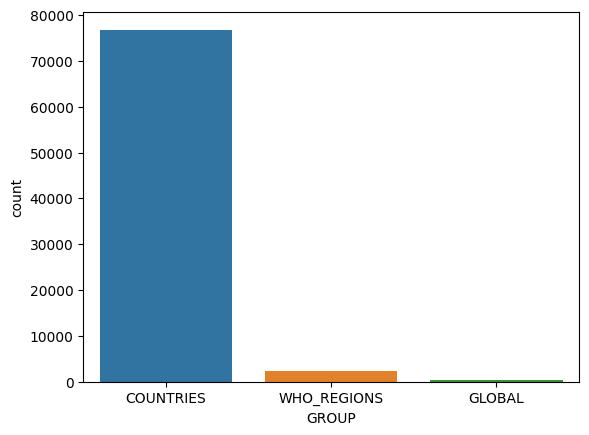

In [250]:
group_counter = copy.deepcopy(incidence_raw)
sns.countplot(data=group_counter, x="GROUP", order=group_counter.GROUP.value_counts().index)

### Pregunta 1.3 -> Gràfics d'Outliers de les enfermetats d'un país.

**Des del dataframe resultant de la pregunta 1.1; o bé des del fitxer <em>incidence_rate_2021_countries.csv<em> crea un gràfic plotbox de les enfermetats d'un país (el que tu vulguis), únicament de les que es mesuren amb el denominador: 'per 1,000,000 total population'.**

**Després, mostra les 5 files d'outliers més alts (les més allunyades de la mitjana)**



<em>Pista: Recomanem fer-lo amb seaborn, que permet seleccionar quina fila (x) i columna (y) volem posar al gràfic<em>

<AxesSubplot: xlabel='INCIDENCE_RATE', ylabel='DISEASE'>

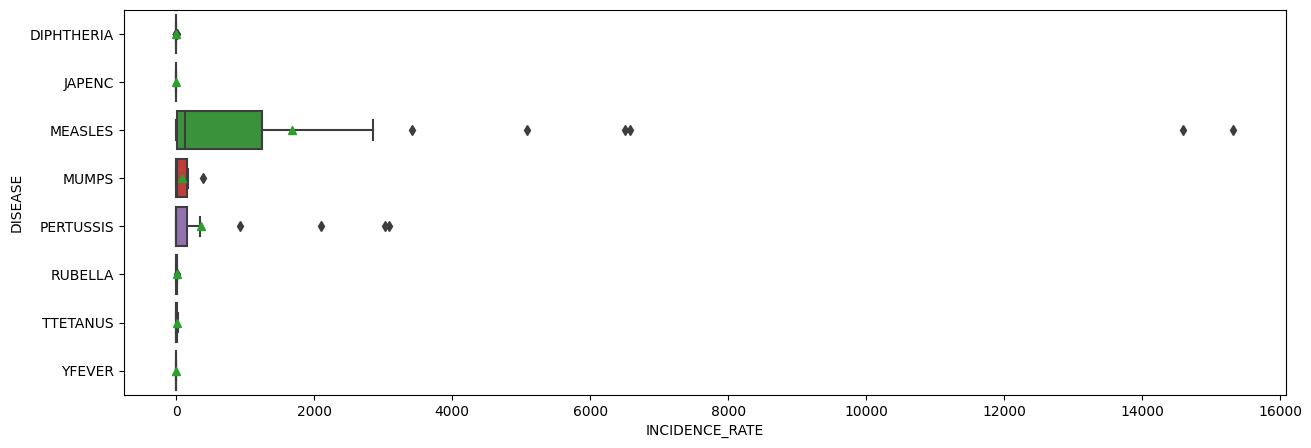

In [251]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_incidence_countries.query("DENOMINATOR == 'per 1,000,000 total population'").query("NAME == 'Rwanda'"), x='INCIDENCE_RATE', y='DISEASE', showmeans=True)

## Part 2 - Fes dues gràfiques d'incidència de les enfermetats: (2,5 punts)

#### Una on es vegi la incidència de les enfermetats d'un país(el que tu vulguis) des del 1980 fins el 2021, ambdós inclosos.
#### Una altre on es vegi la incidència de les enfermetats a nivell global (files on el camp GROUP=GLOBAL, també dels anys 1980-2021 ambdós inclosos.

#### Filtrarem les enfermetats pels valors de la columna DENOMINATOR = 'per 1,000,000 total population' 

<AxesSubplot: xlabel='YEAR', ylabel='INCIDENCE_RATE'>

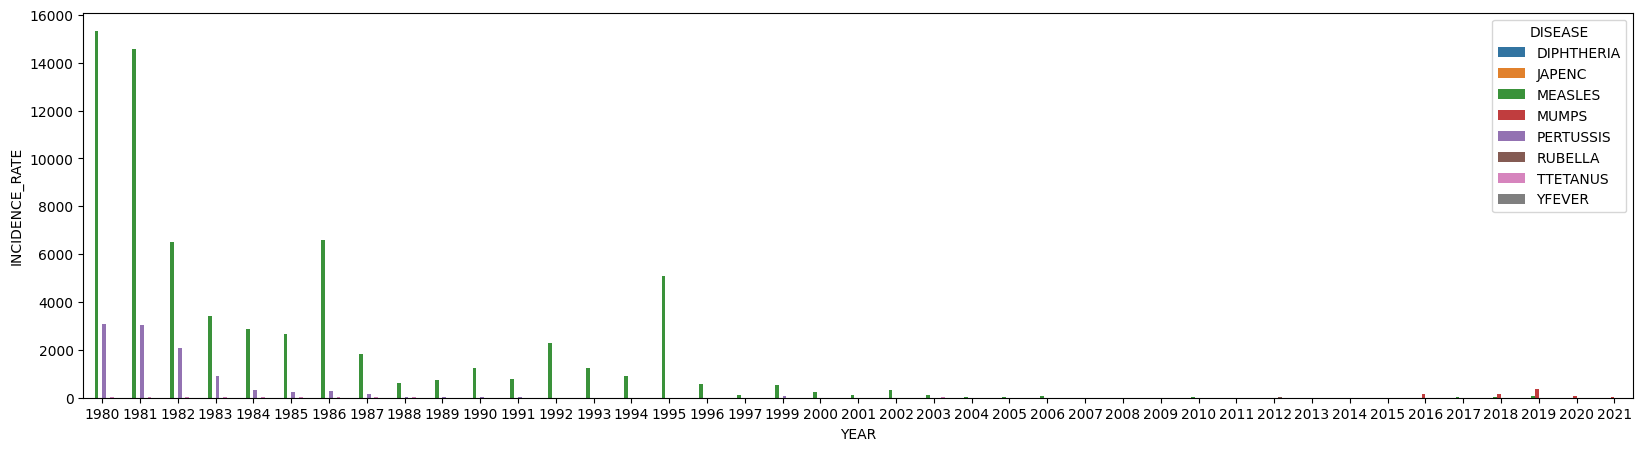

In [252]:
plt.figure(figsize=(20, 5))

incidencia_country = df_incidence_countries.query("DENOMINATOR == 'per 1,000,000 total population'").query("NAME == 'Rwanda'")

sns.barplot(data=incidencia_country, x='YEAR', y='INCIDENCE_RATE', hue="DISEASE")

<AxesSubplot: xlabel='YEAR', ylabel='INCIDENCE_RATE'>

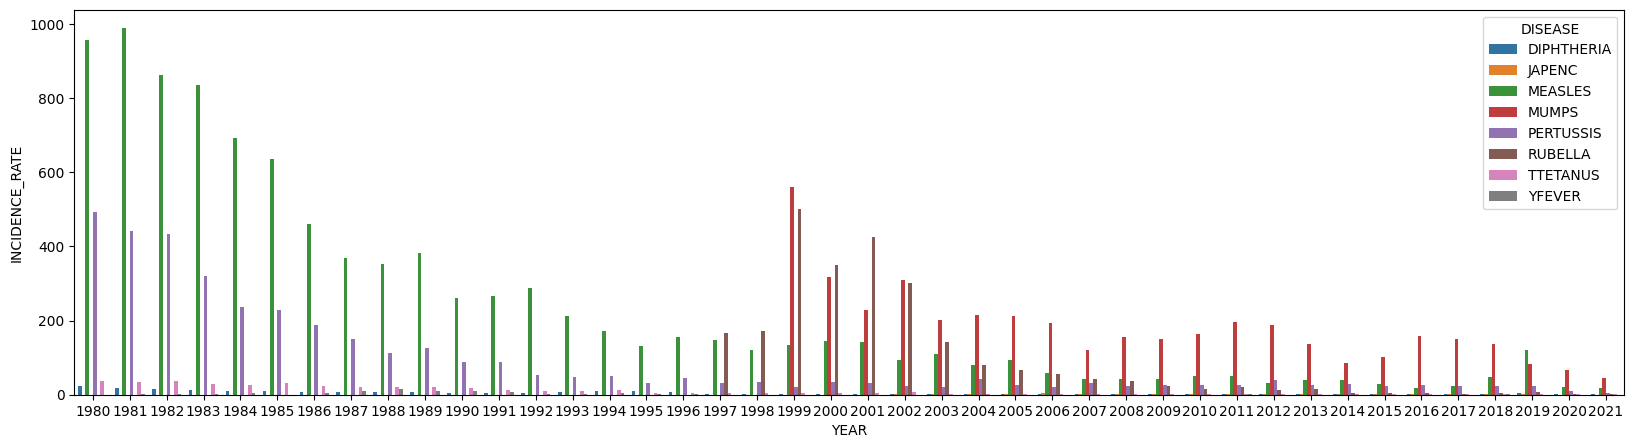

In [253]:
plt.figure(figsize=(20, 5))

incidencia_global = df_incidence_global.query("DENOMINATOR == 'per 1,000,000 total population'").query("GROUP == 'GLOBAL'")


sns.barplot(data=incidencia_global, x='YEAR', y='INCIDENCE_RATE', hue="DISEASE")

## Part 3. Crea un gràfic que serveixi per comparar les dades d'una enfermetat amb molta incidència (per exemple MEASLES) a una agrupació de països del món que tingui almenys 3 països. Afegeix una fila més (2,5 punts)

Pots limitar els anys que apareixen al gràfic (pex 1980 - 1999) si creus que no aporten dades significatives.

Exemple: Incidència del xarampió als països del sud del Mediterrani. ['Morocco', 'Algeria', 'Libya', 'Egypt', 'Jordan', 'Israel']

<AxesSubplot: xlabel='YEAR', ylabel='INCIDENCE_RATE'>

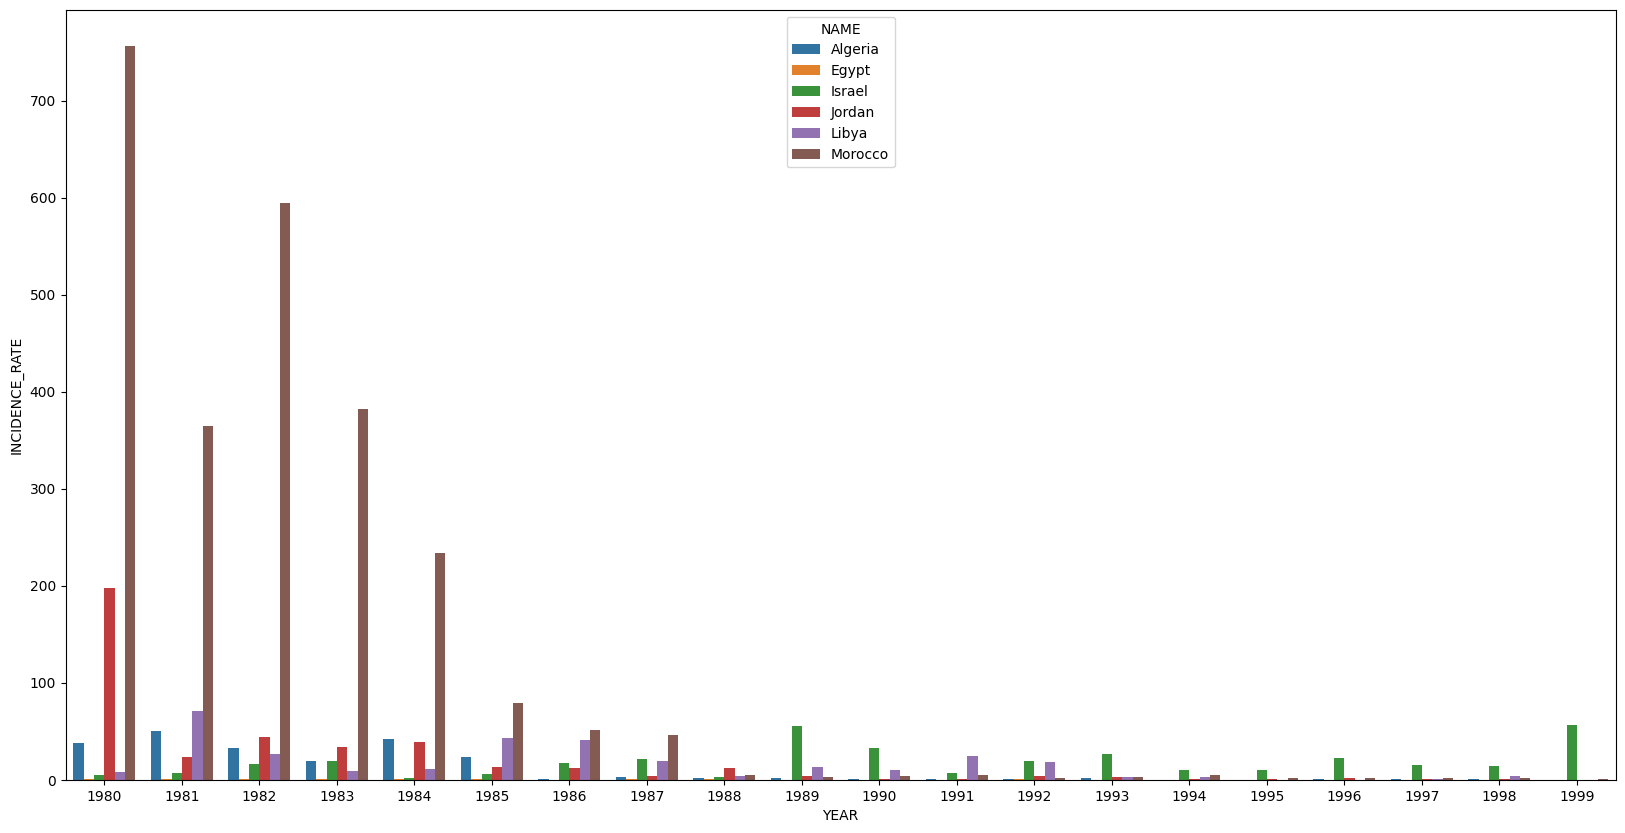

In [254]:
plt.figure(figsize=(20, 10))
incidencia_pert = copy.deepcopy(df_incidence_countries)

incidencia_pert = incidencia_pert.query("DISEASE == 'PERTUSSIS'").query("YEAR>=1980 and YEAR<=1999")

med_countries: list[str] = ['Morocco', 'Algeria', 'Libya', 'Egypt', 'Jordan', 'Israel']

sns.barplot(data=incidencia_pert[incidencia_pert['NAME'].isin(med_countries)], x="YEAR", y="INCIDENCE_RATE", hue="NAME")

## Part 4. Taula de coeficients de correlació entre enfermetats en un país. (2 punts)

Ens demanen comparar la correlació entre 4 enfermetats amb força incidència; per saber si existeix correlació entre elles.

Pots triar el país que vulguis on fer l'estudi; si no saps quin pots triar Espanya.

Les enfermetats a estudiar són:

1. PERTUSSIS
2. MEASELS
3. MUMPS
4. RUBELLA

#### Pistes
* Tal i com estan organitzats els dataframes no ho podràs fer; hauràs de crear un altre dataframe que tingui una fila amb l'any, 
les demés 4 files els valors d'incidència de cada enfermetat.
* Fixa't com ha de quedar la matriu, al fitxer q4_incidence_rate_matrix.csv
* Us facilitem un mètode que, juntament amb les operacions de concaternació, us ajudarà a formar la matriu.
* Un cop tinguis organitzada la matriu, el mètode <strong>corr</strong> és el que obté els coeficients de correlació valors entre (-1 , +1)


#### Primer, creo 2 dataframes que tinguin el radi d'incidència per any de 2 enfermetats i després les fusiono en un únic dataframe, que és el que aplicaré el gràfic.

Per facilitar aquesta creació creo una següent funció.

La forma del dataframe resultat ha de tenir la següent estructura:


<AxesSubplot: >

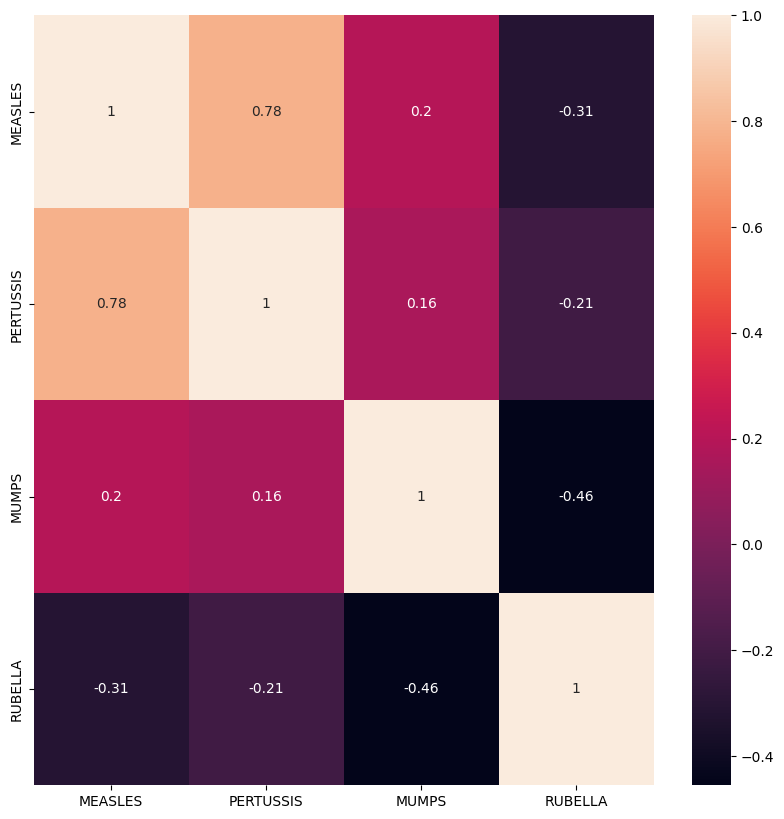

In [255]:
# Agafo el dataframe de les enfermetats a Espanya
# df_incidence_countries_esp

## Funció auxiliar que, donat el nom d'una enfermetat i el dataframe sencer,
## et retorna un datafame amb 2 files, l'any i el incidence_rate de la enfermetat.
def dataframe_incidence_rate_eachyear_bydisease(disease:str, df:pd.DataFrame):
    result = df.query("NAME == 'Rwanda'")
    result = result.query("DISEASE == @disease")
    result = result.loc[:,['YEAR','INCIDENCE_RATE']]
    result = result.set_index("YEAR")
    result = result.rename(columns={"INCIDENCE_RATE":disease})
    return result

incidencia_rwanda = df_incidence_countries.query("NAME == 'Rwanda'")


incidence_measels = dataframe_incidence_rate_eachyear_bydisease('MEASLES',incidencia_rwanda)
incidence_pertussis = dataframe_incidence_rate_eachyear_bydisease('PERTUSSIS',incidencia_rwanda)
incidence_mumps = dataframe_incidence_rate_eachyear_bydisease('MUMPS',incidencia_rwanda)
incidence_rubella = dataframe_incidence_rate_eachyear_bydisease('RUBELLA',incidencia_rwanda)

corr_matrix = pd.concat([incidence_measels, incidence_pertussis, incidence_mumps, incidence_rubella], axis=1, join="inner")

plt.figure(figsize=(10, 10))

sns.heatmap(corr_matrix.corr(method='pearson'), annot=True)

Un cop tenim els 4 dataframes, els podem concatenar per tal de tenir una matriu amb les incidències de cada enfermetat.

Finalment, podem aplicar la funció corr per obtenir una matriu 
de la correlació entre cada variable, amb valors dins l'intèrval (-1, +1)

### Creus que hi ha correlació entre aquestes 4 enfermetats ? 

Entre algunes enfermetats com el Pertussis y el Meales si